In [1]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import  preprocess_input

2024-07-16 15:16:32.459373: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-16 15:16:32.996689: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-16 15:16:32.996723: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-16 15:16:33.091548: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-16 15:16:33.279291: I tensorflow/core/platform/cpu_feature_guar

In [2]:
src_path_train = "./Data_pet_CT/train/"
src_path_valid = "./Data_pet_CT/valid/"
src_path_test = "./Data_pet_CT/test/"

scale=1
rotation=20
# zoom=0.25
width_shift=0.25
height_shift=0.25
shear=0.25

train_datagen = ImageDataGenerator(
        # preprocessing_function=preprocess_input,
        dtype='float32',
        rescale=scale,
        rotation_range=rotation,
        # zoom_range=zoom,
        width_shift_range=width_shift,
        height_shift_range=width_shift,
        shear_range=shear,
        horizontal_flip=True)

valid_datagen = ImageDataGenerator(
        # preprocessing_function=preprocess_input,    
        dtype='float32',
        rescale=scale,) 

test_datagen = ImageDataGenerator(
        # preprocessing_function=preprocess_input,
        dtype='float32',
        rescale=scale,)

In [3]:
BATCH_SIZE = 32
train_generator = train_datagen.flow_from_directory(
    directory=src_path_train,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset='training',
    shuffle=True,
    seed=42
)

valid_generator = valid_datagen.flow_from_directory(
    directory=src_path_valid,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    directory=src_path_test,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    seed=42
)

Found 1099 images belonging to 4 classes.
Found 270 images belonging to 4 classes.
Found 139 images belonging to 4 classes.


In [4]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout

In [5]:
NUM_CLASSES = 4

LOSS_METRICS = ['accuracy']

STEPS_PER_EPOCH_TRAINING = int(train_generator.n / BATCH_SIZE) + 1
STEPS_PER_EPOCH_VALIDATION = int(valid_generator.n / BATCH_SIZE) + 1

In [25]:
model = Sequential()

model.add(ResNet50(
    include_top = False, 
    pooling = 'avg',
    weights = 'imagenet'))
model.layers[0].trainable = False

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation = 'softmax'))


In [26]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_2 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                      

In [54]:
from tensorflow.keras import optimizers

sgd = optimizers.SGD(
    learning_rate = 0.01)
model.compile(
    optimizer = sgd, 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [27]:
from tensorflow.keras import optimizers

adam = optimizers.Adam(
    learning_rate = 0.01)
model.compile(
    optimizer = adam, 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [28]:
fit_history = model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = 50,
        validation_data=valid_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        batch_size=BATCH_SIZE
)

Epoch 1/50
35/35 [==============================] - 12s 270ms/step - loss: 3.6633 - accuracy: 0.6542 - val_loss: 0.9532 - val_accuracy: 0.7926
Epoch 2/50
35/35 [==============================] - 9s 257ms/step - loss: 1.9336 - accuracy: 0.7270 - val_loss: 1.2378 - val_accuracy: 0.7259
Epoch 3/50
35/35 [==============================] - 9s 253ms/step - loss: 1.2301 - accuracy: 0.7762 - val_loss: 0.5071 - val_accuracy: 0.7963
Epoch 4/50
35/35 [==============================] - 9s 252ms/step - loss: 0.8094 - accuracy: 0.8053 - val_loss: 0.3422 - val_accuracy: 0.8519
Epoch 5/50
35/35 [==============================] - 9s 249ms/step - loss: 0.7035 - accuracy: 0.7971 - val_loss: 0.3691 - val_accuracy: 0.8444
Epoch 6/50
35/35 [==============================] - 9s 250ms/step - loss: 0.6030 - accuracy: 0.8289 - val_loss: 0.4235 - val_accuracy: 0.8259
Epoch 7/50
35/35 [==============================] - 9s 245ms/step - loss: 0.5716 - accuracy: 0.8353 - val_loss: 0.2958 - val_accuracy: 0.8889
Epoch

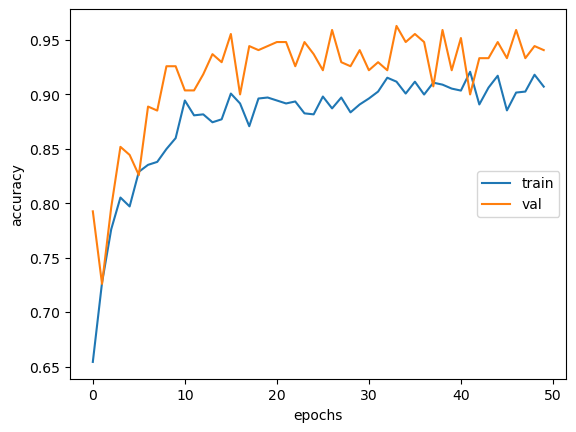

In [68]:
import matplotlib.pyplot as plt
plt.plot(fit_history.history['accuracy'], label = 'train',)
plt.plot(fit_history.history['val_accuracy'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

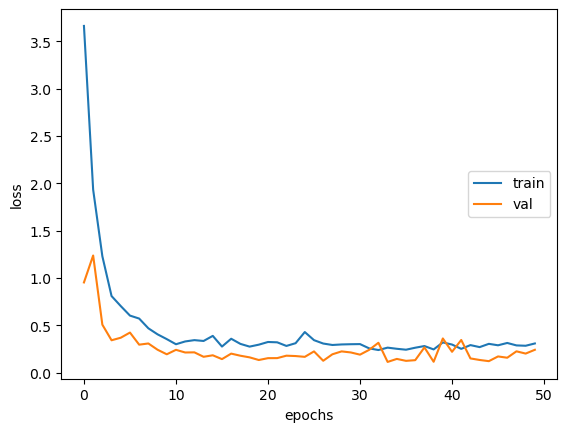

In [69]:
plt.plot(fit_history.history['loss'], label = 'train',)
plt.plot(fit_history.history['val_loss'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [31]:
# model.load_weights('./models/TNM-final/model-c-s-3.h5')
model.evaluate(test_generator)

139/139 [==============================] - 2s 16ms/step - loss: 0.1134 - accuracy: 0.9496


[0.11344561725854874, 0.9496402740478516]

In [67]:
from tensorflow.keras.models import load_model

model = load_model('./models/TNM-final/model-c-a-3.h5')

In [65]:
y_true = []
y_pred = []
res = model.predict(test_generator, verbose=0)
for i in range(test_generator.n):
    y_true.append(test_generator.labels[i])
    y_pred.append(np.argmax(res[i]))

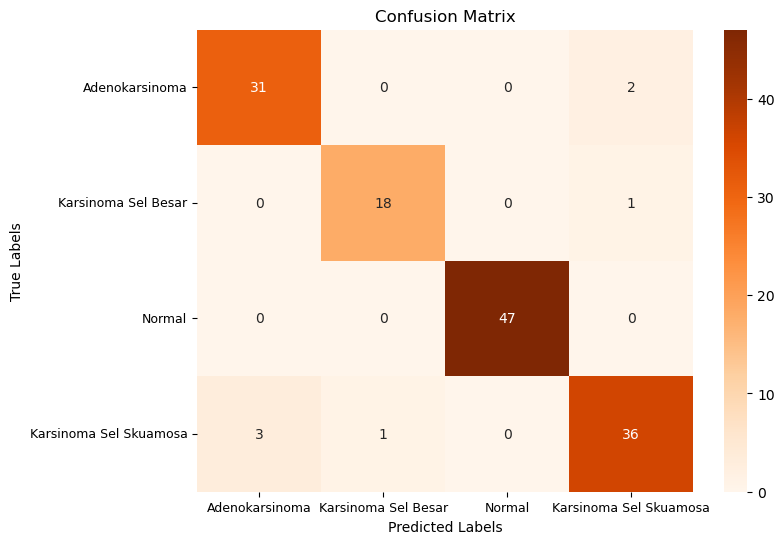

In [62]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


class_name = ["Adenokarsinoma", "Karsinoma Sel Besar", "Normal", "Karsinoma Sel Skuamosa"]
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Oranges',
    xticklabels=class_name, 
    yticklabels=class_name)
plt.xlabel('Predicted Labels')
plt.tick_params(axis='x', labelrotation=0)
plt.tick_params(axis='both', labelsize=9)
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [66]:
from sklearn.metrics import f1_score, precision_score, recall_score

print(precision_score(y_true, y_pred , average="macro"))
print(recall_score(y_true, y_pred , average="macro"))
print(f1_score(y_true, y_pred , average="macro"))

0.9455525125029769
0.9466905901116427
0.9460334901110702


In [33]:
model.save('./models/TNM-final/model-c-a-3.h5')

/home/ariqhakim/miniconda3/envs/tf-gpu/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
